<font size="6"> **Data exploration**  </font>

# Data exploration

In [1]:
#Importing the initial dataset
import pandas as pd
import numpy as np
cstm_data=pd.read_csv(r'C:\Users\HP\Downloads\KU Leuven courses\2023-2024 courses\3. Advanced Analytics in Business\Assignment 1\data (for work)\train.csv')

In [2]:
cstm_data

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,...,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F,0,K262360
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,...,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F,1,K170160
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,...,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F,0,K331610
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,...,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F,0,K332460
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,...,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F,0,K394220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,F,16.0,15/09/97,37.433333,2.0,CAT 200,ASAD90,151.0,1169.400001,201.0,...,OK,0.130433,0.615895,0.346500,0.037605,0.127974,F,F,1,K192650
5040,F,29.0,28/09/96,49.166667,1.0,CAT 100,CAS30,135.0,405.600000,124.0,...,OK,0.189112,0.555769,0.412716,0.031515,0.238615,F,F,1,K295600
5041,M,23.0,08/06/99,16.400000,0.0,CAT 200,BS110,566.0,2382.000000,4.0,...,OK,0.112657,0.810121,0.162330,0.027548,0.043094,F,F,0,K366420
5042,M,46.0,01/03/98,31.866667,2.0,Play 100,S50,72.0,112.200000,31.0,...,OK,0.205957,0.323250,0.664650,0.012100,0.171451,F,F,1,K219850


In [3]:
#Checking data types of the varibales
cstm_data.dtypes

Gender                     object
Age                       float64
Connect_Date               object
L_O_S                     float64
Dropped_Calls             float64
tariff                     object
Handset                    object
Peak_calls_Sum            float64
Peak_mins_Sum             float64
OffPeak_calls_Sum         float64
OffPeak_mins_Sum          float64
Weekend_calls_Sum         float64
Weekend_mins_Sum          float64
International_mins_Sum    float64
Nat_call_cost_Sum         float64
AvePeak                   float64
AveOffPeak                float64
AveWeekend                float64
National_calls            float64
National mins             float64
AveNational               float64
All_calls_mins            float64
Dropped_calls_ratio       float64
Usage_Band                 object
Mins_charge               float64
call_cost_per_min         float64
actual call cost          float64
Total_call_cost           float64
Total_Cost                float64
Tariff_OK     

In [4]:
#Descriptive statistics of the dataset
print(round(cstm_data.describe(),2))

           Age    L_O_S  Dropped_Calls  Peak_calls_Sum  Peak_mins_Sum  \
count  5044.00  5044.00        5044.00         5044.00        5044.00   
mean     31.38    33.63           2.68          239.15         708.61   
std      12.77    14.04           3.43          239.63         503.96   
min      12.00     9.53           0.00            0.00           0.00   
25%      22.00    21.27           0.00           59.00         307.80   
50%      29.00    33.58           1.00          161.00         611.70   
75%      39.00    45.87           2.00          343.00        1015.95   
max      80.00    58.20          15.00         1626.00        2901.60   

       OffPeak_calls_Sum  OffPeak_mins_Sum  Weekend_calls_Sum  \
count            5044.00           5044.00            5044.00   
mean              104.08            312.42              16.49   
std                97.87            199.09              16.38   
min                 0.00              0.00               0.00   
25%              

In [5]:
#Proportion of each churn group
cstm_data.groupby(['target']).size() / cstm_data.shape[0] * 100

target
0    85.229976
1    14.770024
dtype: float64

Better visualization and descriptive opportunities are provided by the Ydata-profiling and AutoViz libraries, therefore their reports are presented below and then used to advance our data cleaning based on that.

In [6]:
#Data exploration using Ydata-profiling library
#Source:https://github.com/ydataai/ydata-profiling

#pip install ydata-profiling

#from ydata_profiling import ProfileReport
#profile = ProfileReport(cstm_data, title="Profiling Report")
#profile

In [7]:
#Saving the report to HTML
#profile.to_file("Pandas_profiling_report.html")

In [8]:
#Data exploration using AutoViz library
#Source: https://github.com/AutoViML/AutoViz

#pip install autoviz

#from autoviz import AutoViz_Class
#av = AutoViz_Class()

#%matplotlib inline
#filename = "C:/Users/HP/Downloads/KU Leuven courses/2023-2024 courses/3. Advanced Analytics in Business/Assignment 1/data (for work)/train.csv"
#sep = ","
#dft = av.AutoViz(
#    filename,
#    sep=",",
#    depVar="target",
#    dfte=None,
#    header=0,
#    verbose=1,
#    lowess=False,
#    chart_format="svg",
#    max_rows_analyzed=150000,
#    max_cols_analyzed=30,
#)

C:\Users\HP\AppData\Local\Temp\ipykernel_11816\4079419140.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_heatmap=sns.heatmap(cstm_data.corr(), linewidth=.5)


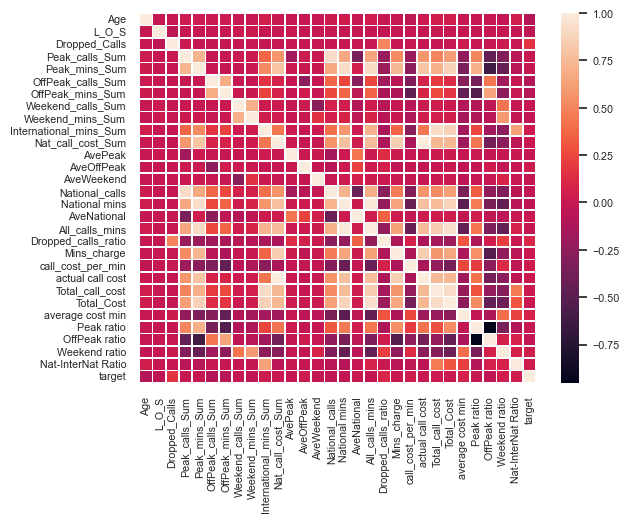

In [9]:
#Correlation heatmap for all the variables
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=0.7)
corr_heatmap=sns.heatmap(cstm_data.corr(), linewidth=.5)
plt.show()

#round(cstm_data.corr(),1) #correlation table

Conclusions from the Data exploration part:

1) Our data has a few missing values (12 cells). They are imputed using the mean and mode imputation techniques later on.

2) There are numerous outliers in our dataset. They are identified using the "Isolation Forest" procedure and then treated accordingly in the coming section.

3) Some variables are highly correlated with one another (correlation up to 0.5-0.9). A variable selection procedure, namely feature selection based on random forest, is implemented later on to reduce the number of features and pick only the most relevant ones.

4) Class imbalance in some of the categorical variables.

For instance, in "Tariff_OK", out of 5044 observations, 5001 are represented by the value "OK". This reflects a considerable class imbalance present in the training dataset. The same goes for "high Dropped calls" and "No Usage". Theses are the 3 categorical variables where class imbalance was observed.

5) Excessive amount of zeros (zero-inflated data) in some of the numeric variables.

- Dropped_Calls - 25.2% zeros
- Dropped_calls_ratio - 25.2% zeros
- actual call cost - 39.1% zeros
- Nat_call_cost_Sum - 38.7% zeros


- Weekend_calls_Sum - 7.7% zeros
- Weekend_mins_Sum - 7.7% zeros
- AveWeekend - 7.7% zeros
- Weekend ratio - 7.7% zeros


- OffPeak_calls_Sum - 1.3% zeros
- OffPeak_mins_Sum - 1.3% zeros
- AveOffPeak - 1.3% zeros
- OffPeak ratio - 1.3% zeros


6) Distribution of our numeric features is non-Gaussian, since this is a real-life dataset. For the absolute majority of them, the distribution is positively skewed. In other words, the majority of datapoints are clustered at the lower end of the scale with a few exceptionally high values at the higher end of the scale (the latter, by their presence, create a long tail on the right side of the peak). Only 2 variables out of 29 numeric ones seem to be negatively skewed, while the remaining 27 variables clearly have a positive skew (judging by the histograms from the Ydata-profiling report).

# Data cleaning

## Data consistency

In [10]:
#Checking consistency of values across the 10 non-numeric variables

##### Categorical variables #####

#cstm_data['Gender'].unique()                #['F', 'M']
#cstm_data['Connect_Date'].unique()          #['20/05/98', '16/12/96', '27/08/97', ..., '06/07/99', '24/06/98', '16/08/98']

#cstm_data['tariff'].unique()                #['Play 100', 'CAT 100', 'CAT 50', 'Play 300', 'CAT 200']
#cstm_data['Handset'].unique()               #['BS210', 'ASAD90', 'WC95', 'BS110', 'S50', 'S80', 'CAS30', 'CAS60','ASAD170','SOP10', 'SOP20']

#cstm_data['Usage_Band'].unique()            #['Med', 'MedLow', 'MedHigh', 'High', 'Low', nan]
#cstm_data['Tariff_OK'].unique()             #['OK', 'High CAT 100', 'High CAT 50', 'High Play 100']

#cstm_data['target'].unique()                #[0, 1]
#cstm_data['id'].unique()                    #['K262360', 'K170160', 'K331610', ..., 'K366420', 'K219850','K289480']


##### Boolean variables #####

#cstm_data['high Dropped calls'].unique()    #['F', 'T']
#cstm_data['No Usage'].unique()              #['F', 'T']

Our data seems to be consistent across all non-numeric variables: no errors or miscoded duplicates were detected within them.

It is also worth noting that we don't have any duplicate rows, as inicated in the Ydata-profiling report. Hence, no rows need to be treated in a special way or deleted for this particular reason.

## Missing values

In [11]:
# Detection of missing values across all variables
cstm_data.isnull().sum()

Gender                    0
Age                       0
Connect_Date              0
L_O_S                     0
Dropped_Calls             0
tariff                    0
Handset                   0
Peak_calls_Sum            0
Peak_mins_Sum             0
OffPeak_calls_Sum         0
OffPeak_mins_Sum          0
Weekend_calls_Sum         0
Weekend_mins_Sum          0
International_mins_Sum    0
Nat_call_cost_Sum         0
AvePeak                   0
AveOffPeak                0
AveWeekend                0
National_calls            0
National mins             0
AveNational               0
All_calls_mins            0
Dropped_calls_ratio       4
Usage_Band                4
Mins_charge               0
call_cost_per_min         4
actual call cost          0
Total_call_cost           0
Total_Cost                0
Tariff_OK                 0
average cost min          0
Peak ratio                0
OffPeak ratio             0
Weekend ratio             0
Nat-InterNat Ratio        0
high Dropped calls  

Missing values represent less than 0.1% of our data, according to the Ydata-profiling report. Namely, it revealed that there are 12 missing values in our dataset across 3 variables:
- Dropped_calls_ratio - numeric (4 NAs);
- call_cost_per_min - numeric (4 NAs);
- Usage_Band - categorical (4 NAs).

To eliminate missing values, it was decided to impute them by their respective medians in case of numeric variables (median was chosen as a replacement to ensure robustness of imputation). For the single categorical variable with missing data, mode was used, thus replacing NAs with the most common category among all.

In [12]:
#Treatment of missing values (their imputation by the respective median or mode)

median1=cstm_data['Dropped_calls_ratio'].median()  #0.0023
cstm_data['Dropped_calls_ratio'] = cstm_data['Dropped_calls_ratio'].fillna(median1)

median2=cstm_data['call_cost_per_min'].median()    #9.5139
cstm_data['call_cost_per_min'] = cstm_data['call_cost_per_min'].fillna(median2)

mode3=cstm_data['Usage_Band'].mode()               #Med
cstm_data['Usage_Band'] = cstm_data['Usage_Band'].fillna(mode3[0])

## Outliers

To deal with outliers, "Isolation Forest" procedure was implemented on our dataset. It represents an outlier-detection tree-based tool that isolates outliers from inliers by random splits. Namely, the algorithm randomly selects a feature and a split value for it. Hence, anomalies, due to having a shorter path in the tree, are more quickly isolated from the remaining data. Isolation Forest was applied on all of the available numeric columns, namely 29 (the rest of the columns in the dataset are categorical and boolean ones).                                                     

In [13]:
# Detection of outliers: Isolation Forest
from sklearn.ensemble import IsolationForest

#List of numeric columns
numeric_columns = cstm_data._get_numeric_data().columns[0:29] #selecting everything, except for the "target" variable
numeric_columns #29 numeric columns

Index(['Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum',
       'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum',
       'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum',
       'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls',
       'National mins', 'AveNational', 'All_calls_mins', 'Dropped_calls_ratio',
       'Mins_charge', 'call_cost_per_min', 'actual call cost',
       'Total_call_cost', 'Total_Cost', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio'],
      dtype='object')

In [14]:
#List of categorical and boolean columns
categorical_columns = list(set(cstm_data.columns) - set(numeric_columns))
categorical_columns #10 categorical variables

['target',
 'Tariff_OK',
 'Handset',
 'tariff',
 'Usage_Band',
 'Gender',
 'Connect_Date',
 'high Dropped calls',
 'No Usage',
 'id']

In [15]:
#Finding outliers based on the values of all numeric columns
outlier_detect = IsolationForest(random_state=0).fit(cstm_data[numeric_columns])

#Checking the outlier detection model's output
cstm_data['scores'] = outlier_detect.decision_function(cstm_data[numeric_columns])
cstm_data['anomaly'] = outlier_detect.predict(cstm_data[numeric_columns])

In [16]:
cstm_data[['scores', 'anomaly']] #-1 stands for an outlier, 1 for an ordinary datapoint

,scores,anomaly
0,0.096497,1
1,0.082446,1
2,0.080090,1
3,0.070597,1
4,0.082698,1
...,...,...
5039,0.049559,1
5040,0.133401,1
5041,-0.084790,-1
5042,0.072251,1


In [17]:
#Number of outliers identified by the Isolation Forest method
print(cstm_data.loc[cstm_data['anomaly'] == -1,].count()[0])

#Percentage of outliers in our dataset
out_perc = round(497/5044*100,2)
print(out_perc)

497
9.85


Our model identified 497 outliers, which constitites 9.85% of all the existing observations. Let's also visually examine them before choosing a particular method for handling them within our data.

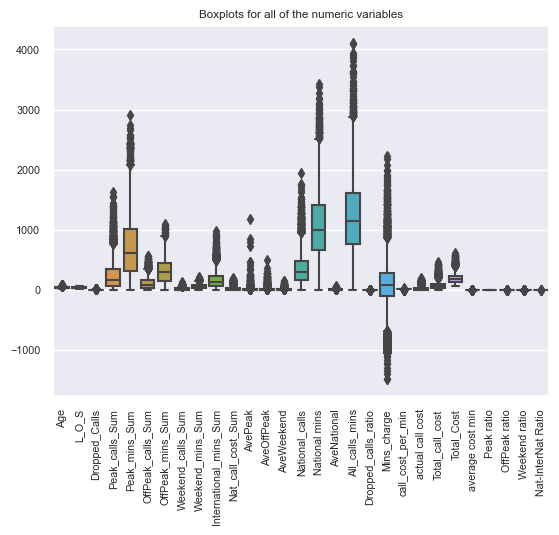

In [18]:
#Visual inspection of outliers via Boxplots (for all of the numeric variables)

boxplots = sns.boxplot(data = cstm_data[numeric_columns])
boxplots.set(title='Boxplots for all of the numeric variables')
boxplots.set_xticklabels(boxplots.get_xticklabels(),rotation=90)
plt.show()

We have outliers mostly on the upper end in our dataset. Although there is a few variables, for which outliers are present on both the upper and the lower end of the spectrum. This once again proves that the majority of our variables are positively skewed, although there is a very small number of variables whose distribution is negatively-skewed.

Since these are valid outliers, it is advisable not to remove them from the dataset, but rather to treat them in such a way that would allow subsequent statictical and/or ML models (including those that are sensitive to outliers) to process them and produce valid results. A possible solution in this case is to transform the data, thus limiting the impact of outliers on the model estimation later on.

## Feature-engineering

We extracted some valuable information from the initially available date variable, i.e. "Connect_Date". Namely, account age days, month, year and quarter were retrieved on the basis of it.

In [19]:
#Treatment of the "Connect_Date" variable
date_df = pd.DataFrame()

#Converting 'Connect_Date' to datetime format
date_df['Connect_Date'] = pd.to_datetime(cstm_data['Connect_Date'], format='%d/%m/%y')

#Correcting Y2K dates
date_df['Connect_Date'] = date_df['Connect_Date'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > 2022 else x)

#Calculating 'Account_Age_days' feature
reference_date = pd.to_datetime('2023-01-01')
date_df['Account_Age_days'] = (reference_date - date_df['Connect_Date']).dt.days

#Creating additional temporal features
date_df['Connect_Month'] = date_df['Connect_Date'].dt.month
date_df['Connect_Quarter'] = date_df['Connect_Date'].dt.quarter
date_df['Connect_Year'] = date_df['Connect_Date'].dt.year

date_df=date_df.drop('Connect_Date', axis=1)

The inital date variable ("Connect_Date") was removed from the list of categorical predictors, since the most valuable information was already extracted from it. Other variables that were removed from this list include the "id" variable (an identifier) and the target (a dependent variable). As a result, the following reduced list of the most relevant categorical predictors was obtained.

In [20]:
#List of categoricals to one-hot_encode/dummify
categorical_columns.remove('Connect_Date')
categorical_columns.remove('id')
categorical_columns.remove('target')
categorical_columns #7 categorical variables

['Tariff_OK',
 'Handset',
 'tariff',
 'Usage_Band',
 'Gender',
 'high Dropped calls',
 'No Usage']

## Transformation of categorical variables 

One-hot-encoding was used as a transformation method for our categorical variables. However, before proceeding to it, we renamed values in the two following categorical variables: "No Usage" and "high Dropped calls". In the absence of this modification, we would have obtained two columns with absolutely identical names ("T"), which would complicate their distinction during the subsequent feature selection step.

In [21]:
#Renaming identical values in two categorical columns
cstm_data['No Usage'].replace({"T": 'True_No Usage', "F": "False_No Usage"}, inplace = True)
cstm_data['high Dropped calls'].replace({"T": 'True_high Dropped calls', "F": "False_high Dropped calls"}, inplace = True)

In [22]:
#Transformation of categorical variables: One-hot-encoding
dummies_df = pd.concat([pd.get_dummies(cstm_data[i], drop_first=True) for i in categorical_columns], axis=1)
dummies_df

,High CAT 50,High Play 100,OK,ASAD90,BS110,BS210,CAS30,CAS60,S50,S80,...,CAT 50,Play 100,Play 300,Low,Med,MedHigh,MedLow,M,True_high Dropped calls,True_No Usage
0,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5040,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5041,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5042,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0


In [23]:
#Obtaining the final dataframe of categorical predictors: date information + dummies
categoricals_df = pd.concat([date_df, dummies_df], axis=1)
categoricals_df.dtypes #28 categorical variables

Account_Age_days           int64
Connect_Month              int64
Connect_Quarter            int64
Connect_Year               int64
High CAT 50                uint8
High Play 100              uint8
OK                         uint8
ASAD90                     uint8
BS110                      uint8
BS210                      uint8
CAS30                      uint8
CAS60                      uint8
S50                        uint8
S80                        uint8
SOP10                      uint8
SOP20                      uint8
WC95                       uint8
CAT 200                    uint8
CAT 50                     uint8
Play 100                   uint8
Play 300                   uint8
Low                        uint8
Med                        uint8
MedHigh                    uint8
MedLow                     uint8
M                          uint8
True_high Dropped calls    uint8
True_No Usage              uint8
dtype: object

## Transformation of numeric variables

The reason for transforming numeric data is to get Gaussian-distributed features, which are required for the large majority of models (for instance, regression, SVM, K-nearest neighbors, neural networks).

It was decided to apply the QuantileTransformer() from the "sklearn" module to perform quantile normalization of our features. Other transformations (namely, robust scaler, standartization, normalization) were also examined, yet none of them yielded a bell-shaped distribution for the vast majority of features, whereas quantile normalization did. For this reason, QuantileTransformer() was ultimately applied to all of our numeric features.

Quantile normalization represents a feature-scaling technique that is robust to outliers due to using robust statistics, namely the quantiles. It applies a non-linear transformation, which results in each feature's density being mapped to a Gaussian distribution. Consequently, outliers end up not looking different from inliers.

In [24]:
#Transformation of numeric variables: Quantile normalization (robust transformation technique)
from sklearn.preprocessing import QuantileTransformer
numeric_quant = QuantileTransformer(output_distribution = 'normal', random_state = 0).fit_transform(cstm_data[numeric_columns])
quant_df = pd.DataFrame(numeric_quant, columns = numeric_columns)
#quant_df

#Ydata-profining report
#profile5 = ProfileReport(quant_df, title="Profiling Report: after transformation")
#profile5

#Saving the report to HTML
#profile5.to_file("Quantile_normalization_report (2).html")

quant_df is a dataset with all numeric variables transformed (quantile-normalized).

In [25]:
#Preparing the final dataset: transformed numericals + transformed categoricals + target
cstm_data_final = pd.concat([quant_df, categoricals_df, cstm_data["target"]], axis=1)
#cstm_data_final.dtypes
cstm_data_final.shape #58 variables

(5044, 58)

## Feature selection

The amount of predictors available for analysis turned out to be rather large (57 variables). For this reason, the Random forest procedure was applied to select the most relevant features and drop the least informative ones.

Random forest is an ensemble method that does feature selection by design to avoid overfitting. It passes random subsets of features to decision trees within it and then extracts the average result across all of them. Namely, it assesses how often this or that feature is used across all the trees, thus determining more important and less important features.

In [26]:
#Random forest for feature selection
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)

X = cstm_data_final.iloc[:,0:57]
target = cstm_data_final.iloc[:,57]

forest.fit(X, target)

RandomForestClassifier(random_state=0)

Based on the feature importance values from the random forest, we obtained a list of features classified by their importance in descending order. Then applying a threshold value of 0.01, the most important features with respect to this threshold were selected.

In [27]:
importances_rf = forest.feature_importances_

<AxesSubplot:>

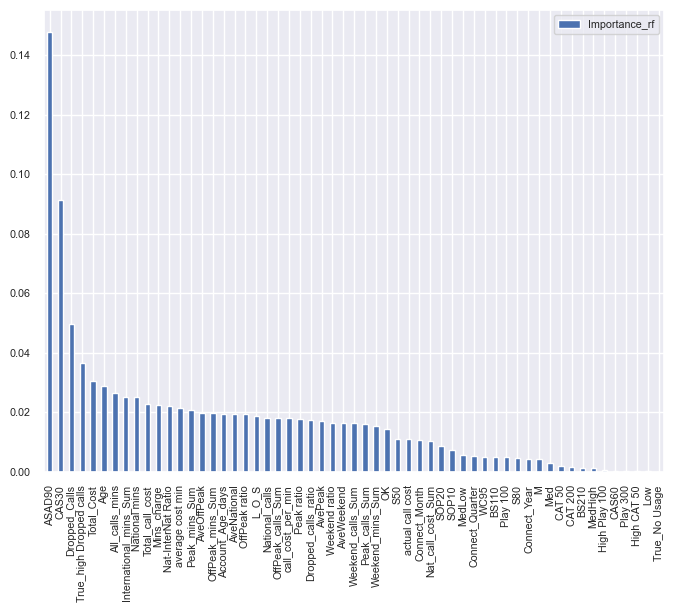

In [28]:
feat_importances_rf = pd.DataFrame(importances_rf, index=X.columns, columns=["Importance_rf"])
feat_importances_rf.sort_values(by='Importance_rf', ascending=False, inplace=True)
feat_importances_rf.plot(kind='bar', figsize=(8,6))

In [29]:
#Selecting features with importance values greater than a given threshold
threshold_rf_1 = 0.01
selected_features_rf_1 = X.columns[importances_rf > threshold_rf_1]
print(selected_features_rf_1)
print(len(selected_features_rf_1))

Index(['Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum',
       'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum',
       'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum',
       'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls',
       'National mins', 'AveNational', 'All_calls_mins', 'Dropped_calls_ratio',
       'Mins_charge', 'call_cost_per_min', 'actual call cost',
       'Total_call_cost', 'Total_Cost', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio',
       'Account_Age_days', 'Connect_Month', 'OK', 'ASAD90', 'CAS30', 'S50',
       'True_high Dropped calls'],
      dtype='object')
36


Feature selection procedure on the basis of Random forest yielded a dataset containing 36 most relevant predictors for our case.

Data exploration earlier revealed that some of the variables are highly correlated with one another (correlation up to 0.9). Hence some of them should be removed to avoid multicollinearity and increase efficiency. To this end, variables that are highly correlated with one another (i.e. correlation higher than 0.7) were detected, and one of these highly correlated variables was removed in each such pair.

In [30]:
#Removing highly correlated variables based on their correlation
data_sel = cstm_data_final[selected_features_rf_1]
data_corr = data_sel.corr().abs()

#Creating and applying mask
mask = np.triu(np.ones_like(data_corr, dtype=bool))
tri_df = data_corr.mask(mask)
round(tri_df,2)

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,...,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,Account_Age_days,Connect_Month,OK,ASAD90,CAS30,S50,True_high Dropped calls
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L_O_S,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dropped_Calls,0.02,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Peak_calls_Sum,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Peak_mins_Sum,0.02,0.00,0.01,0.77,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OffPeak_calls_Sum,0.02,0.00,0.00,0.00,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OffPeak_mins_Sum,0.02,0.00,0.01,0.02,0.03,0.76,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekend_calls_Sum,0.02,0.00,0.00,0.02,0.02,0.02,0.01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekend_mins_Sum,0.02,0.01,0.00,0.03,0.04,0.02,0.02,0.92,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
International_mins_Sum,0.07,0.01,0.01,0.32,0.45,0.17,0.24,0.06,0.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Selecting highly correlated features (correlation higher than 0.7)
high_corr = [c for c in tri_df.columns if any (tri_df[c] > 0.7)]
high_corr

['L_O_S',
 'Dropped_Calls',
 'Peak_calls_Sum',
 'Peak_mins_Sum',
 'OffPeak_calls_Sum',
 'OffPeak_mins_Sum',
 'Weekend_calls_Sum',
 'Weekend_mins_Sum',
 'International_mins_Sum',
 'Nat_call_cost_Sum',
 'AvePeak',
 'AveWeekend',
 'National_calls',
 'National mins',
 'All_calls_mins',
 'Mins_charge',
 'Total_call_cost',
 'Peak ratio']

In [32]:
data_sel.shape

(5044, 36)

In [33]:
data_sel_2 = data_sel.drop(columns = high_corr)

In [34]:
data_sel_2.shape

(5044, 18)

In [35]:
data_sel_2.columns

Index(['Age', 'AveOffPeak', 'AveNational', 'Dropped_calls_ratio',
       'call_cost_per_min', 'actual call cost', 'Total_Cost',
       'average cost min', 'OffPeak ratio', 'Weekend ratio',
       'Nat-InterNat Ratio', 'Account_Age_days', 'Connect_Month', 'OK',
       'ASAD90', 'CAS30', 'S50', 'True_high Dropped calls'],
      dtype='object')

As a result, we obtained 18 predictor variables (data_sel_2) to be used in the data modeling of the coming sections.

# Building the pipeline

# Supervised learning: binary classification task

In [36]:
#Possible models:

#Decision tree
#Logistic regression
#iForest
#XGBoost
#Neural Networks

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1280
           1       0.79      0.50      0.61       234

    accuracy                           0.90      1514
   macro avg       0.85      0.74      0.78      1514
weighted avg       0.90      0.90      0.89      1514

AUC =  0.8863882211538461


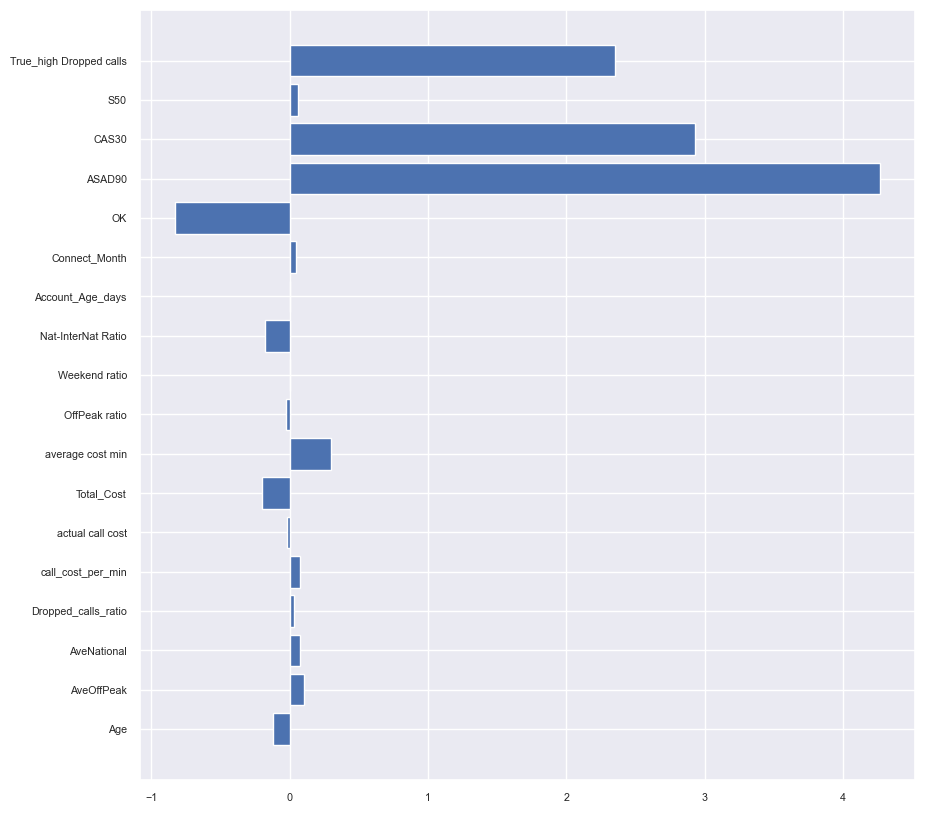

In [39]:
#Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

x_train, x_test, y_train, y_test = train_test_split(data_sel_2, target, test_size=0.3)
model = LogisticRegression(max_iter=10000, random_state=0)
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(classification_report(y_test, pred))

print('AUC = ', roc_auc_score(y_test, model.predict_proba(x_test)[::,1]))
plt.figure(figsize=(10,10))
plt.barh(data_sel_2.columns, model.coef_.flatten())
plt.show()